In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
df.info

<bound method DataFrame.info of      Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3 

Distribution plots for Density feature is shown


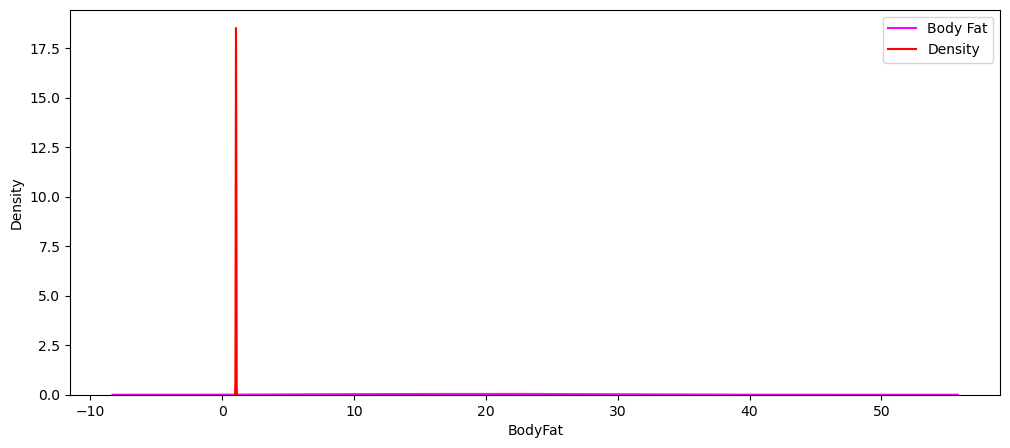

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is shown


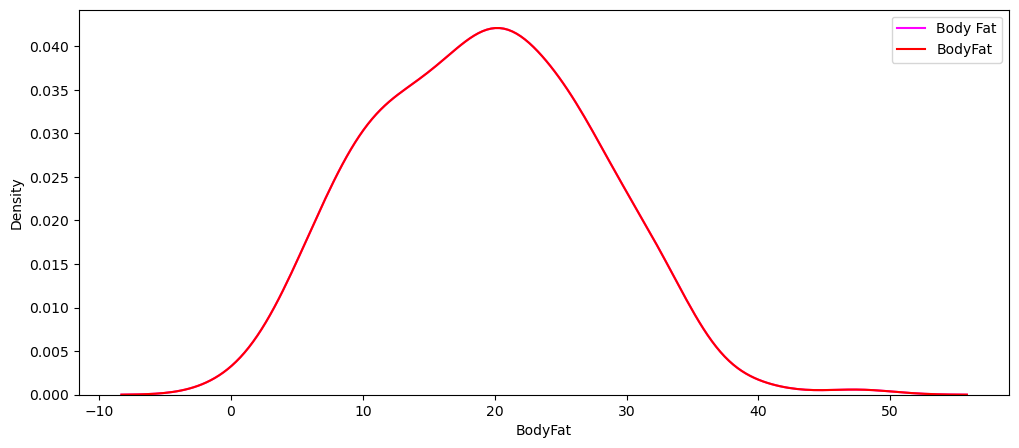

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is shown


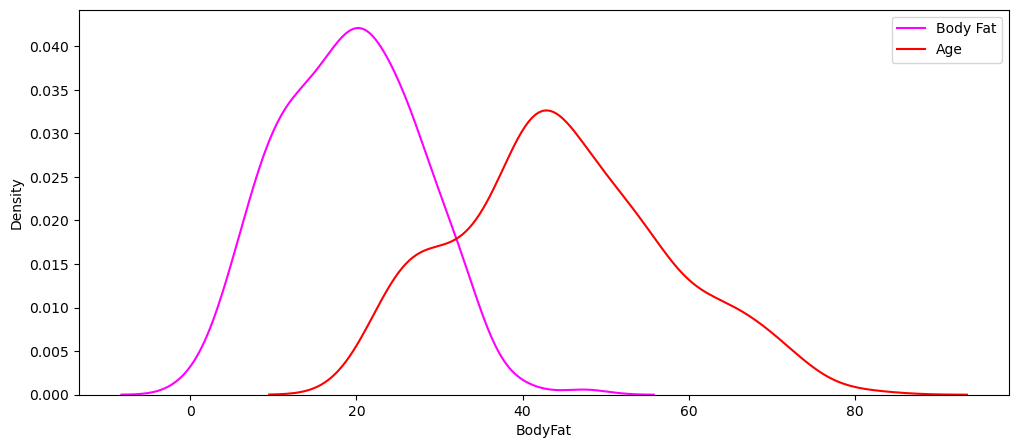

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown


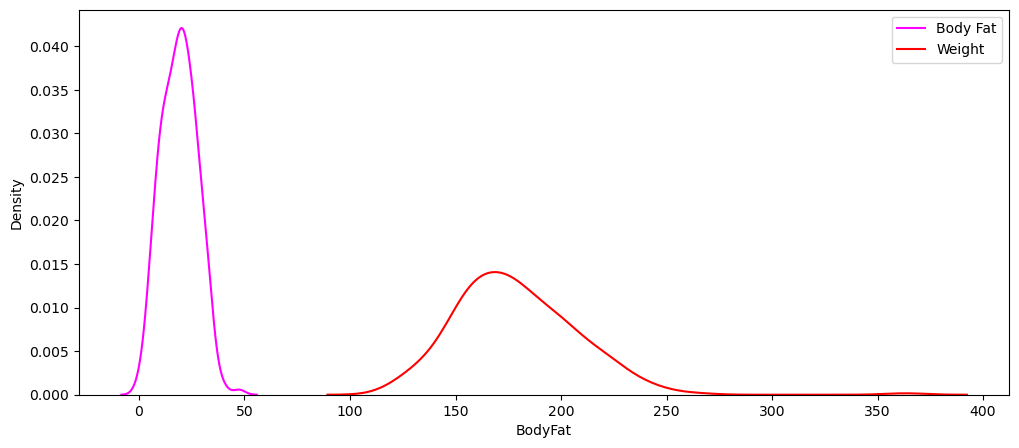

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is shown


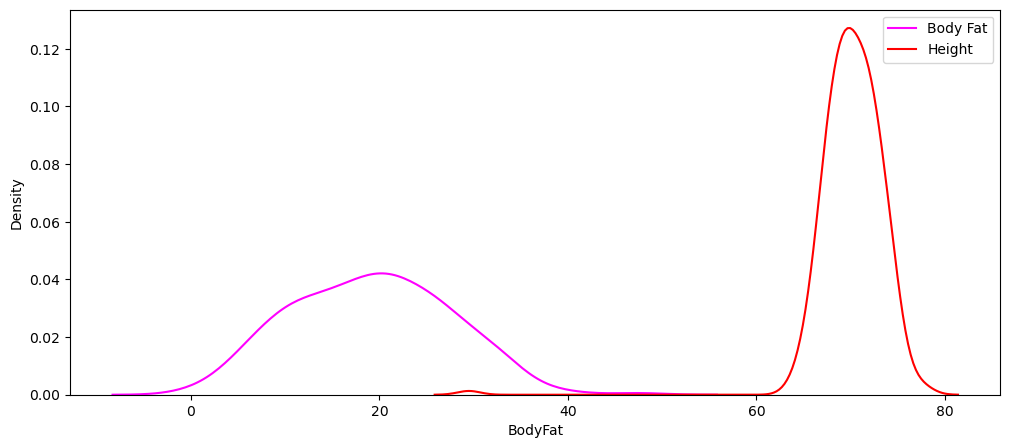

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is shown


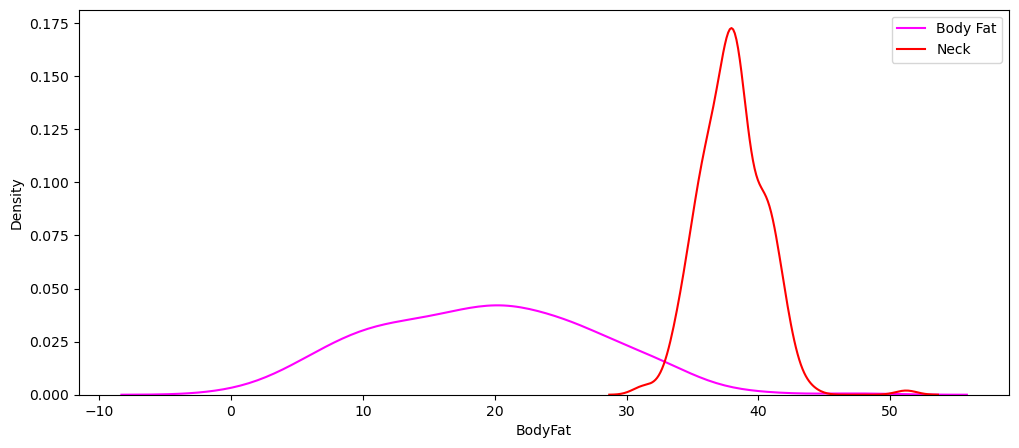

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown


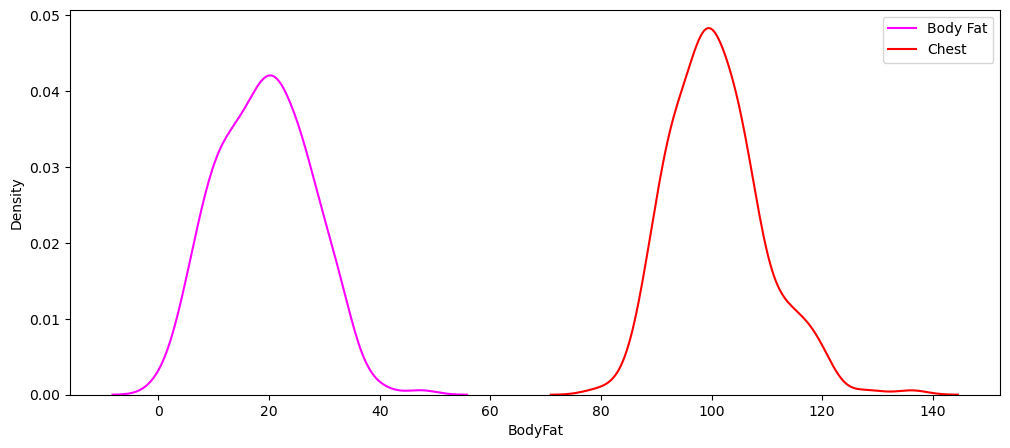

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown


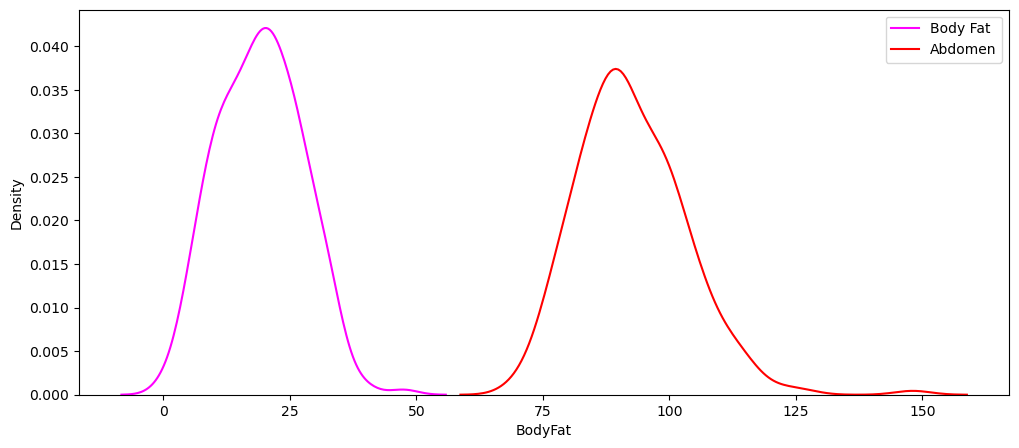

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown


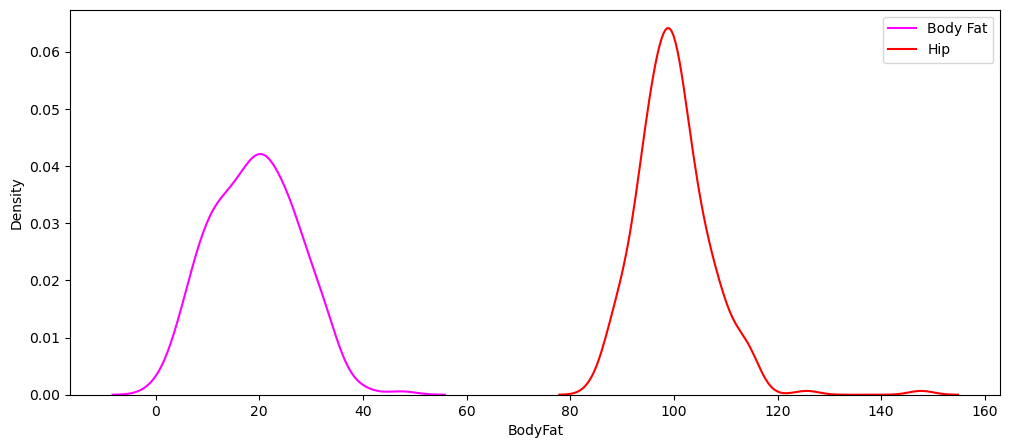

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is shown


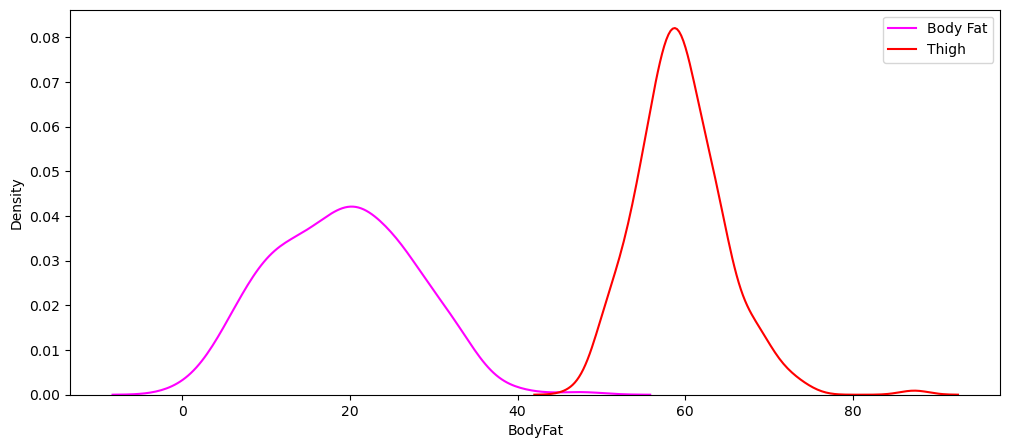

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is shown


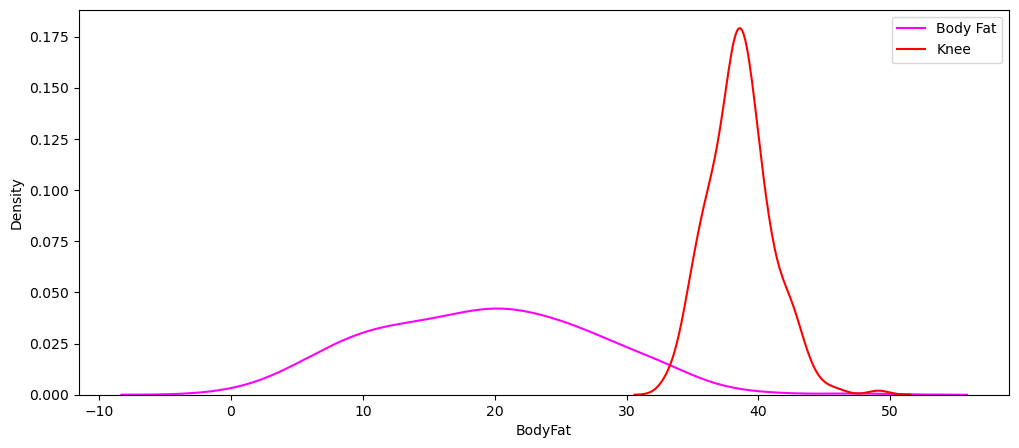

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is shown


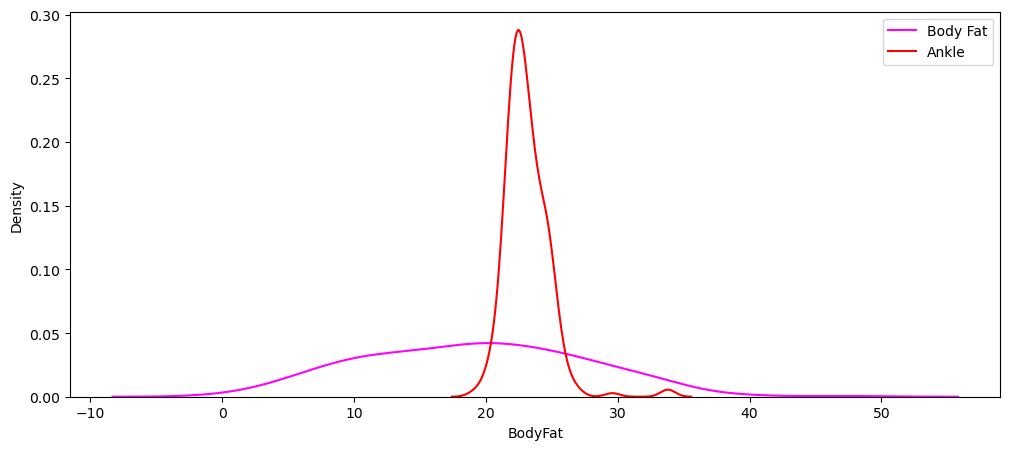

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown


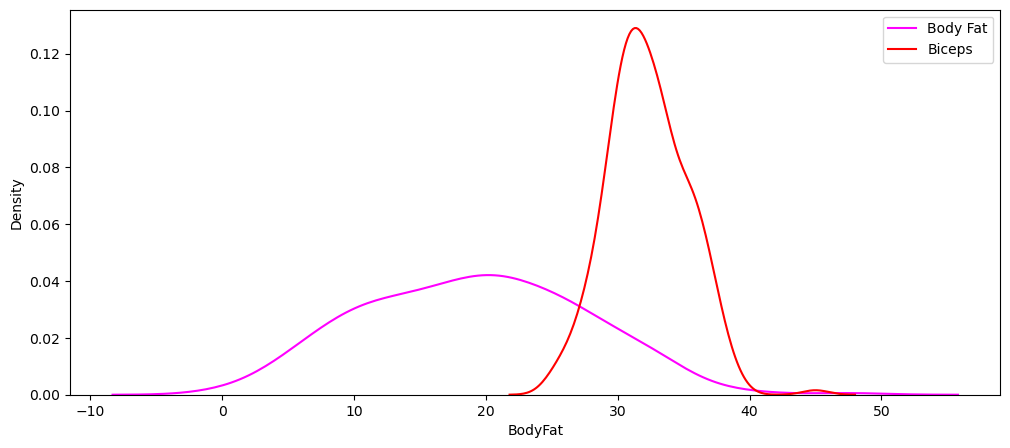

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is shown


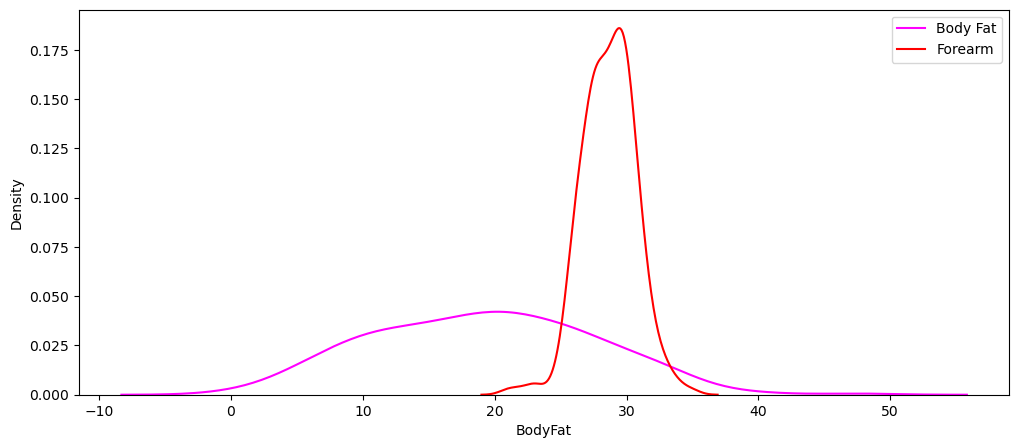

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is shown


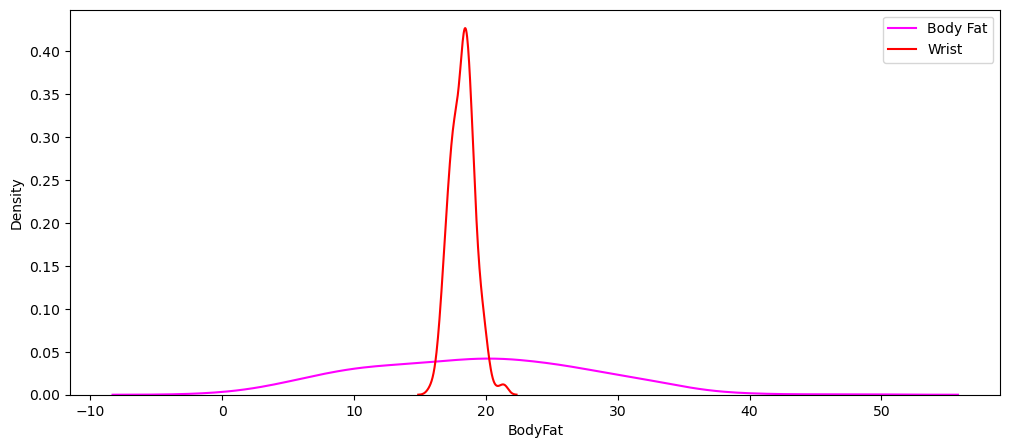

----------------------------------------------------------------------------------------------------


In [4]:
def plotdistplots(col):
    plt.figure(figsize=(12,5))
    sn.kdeplot(df['BodyFat'], color='magenta', label = 'Body Fat')
    sn.kdeplot(df[col], color = 'red', label = col)
    plt.legend()
    plt.show()
    
cols = list(df.columns)
for i in cols:
    print(f'Distribution plots for {i} feature is shown')
    plotdistplots(i)
    print("-"*100)

In [5]:
import scipy.stats as stats

Distribution plots for the feature Density are shown


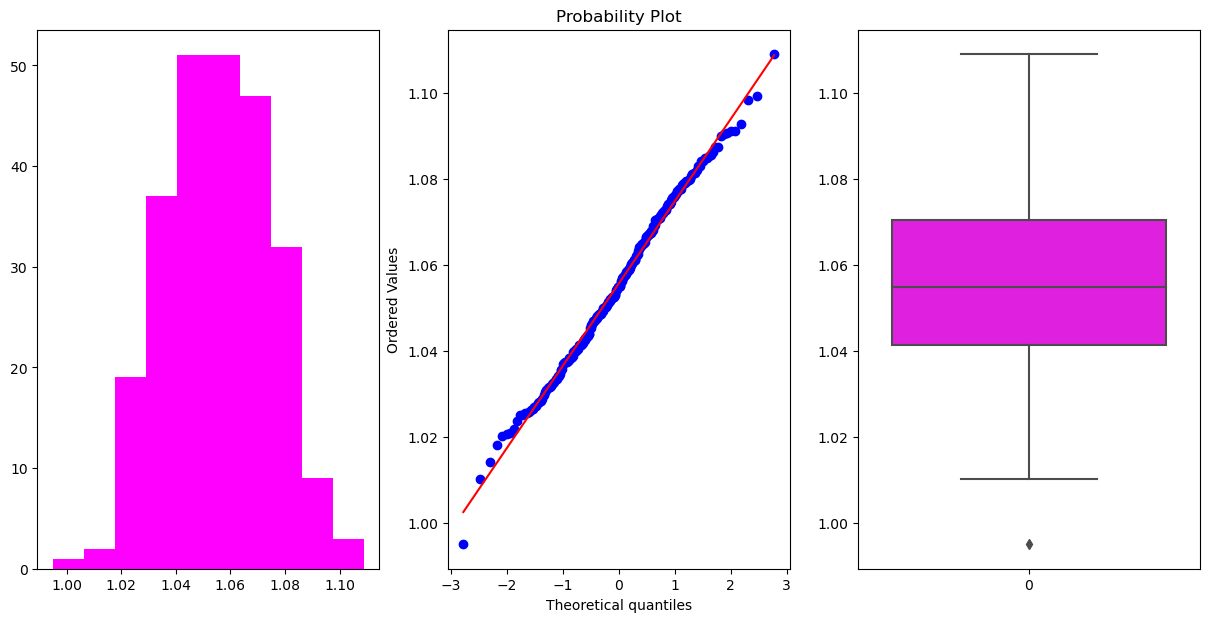

Distribution plots for the feature BodyFat are shown


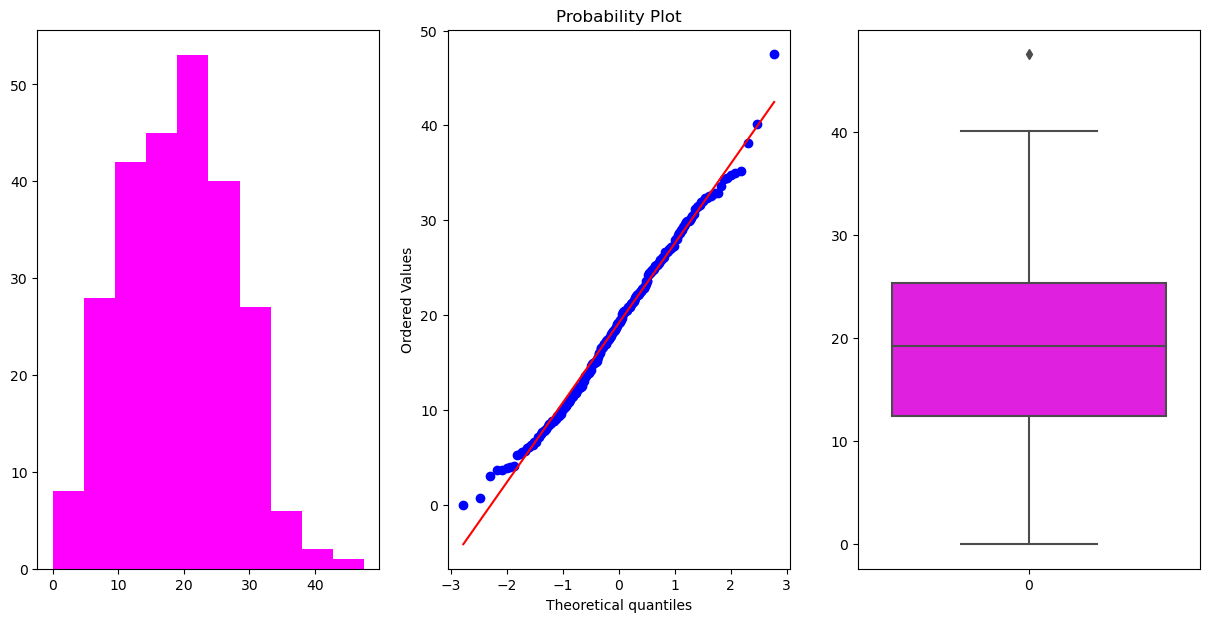

Distribution plots for the feature Age are shown


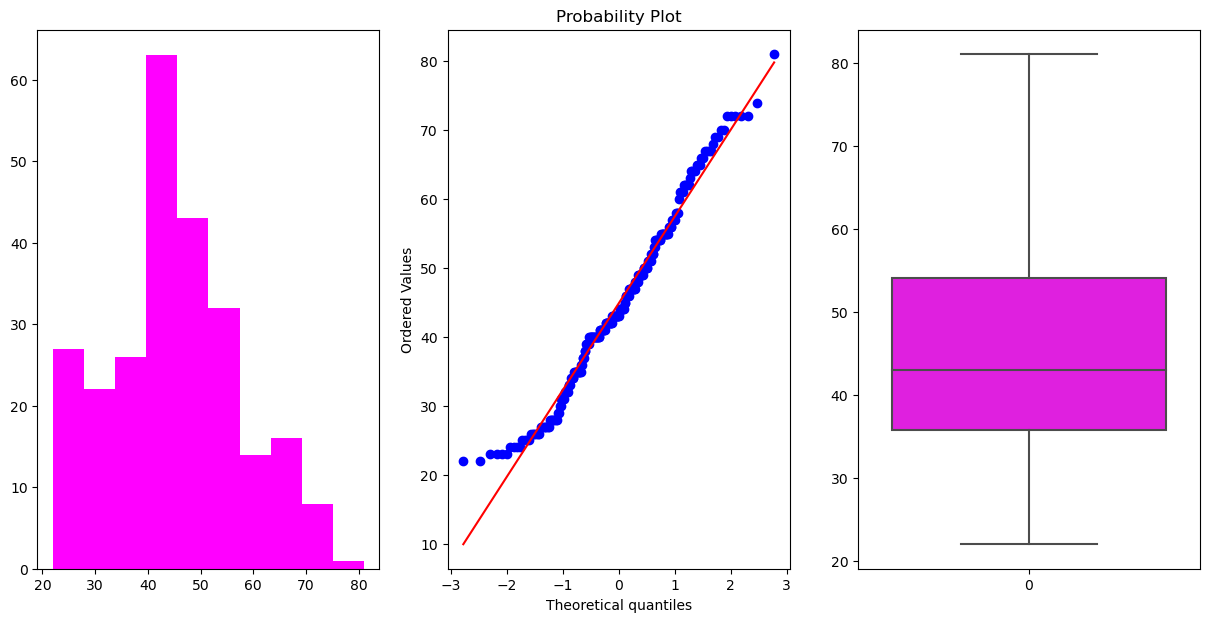

Distribution plots for the feature Weight are shown


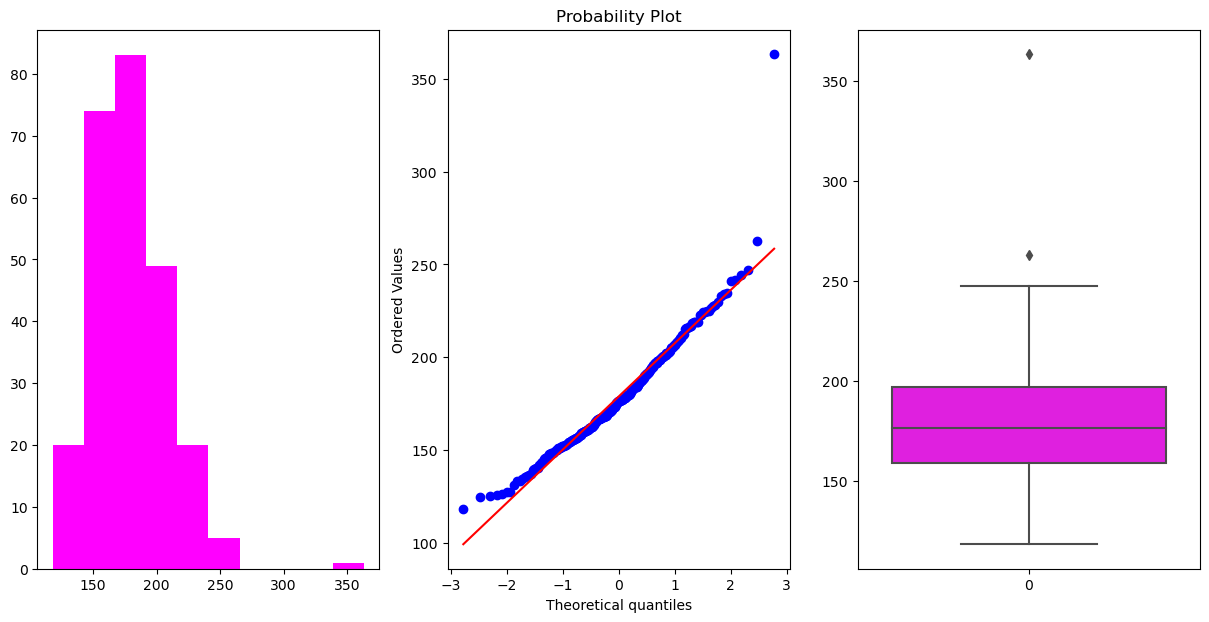

Distribution plots for the feature Height are shown


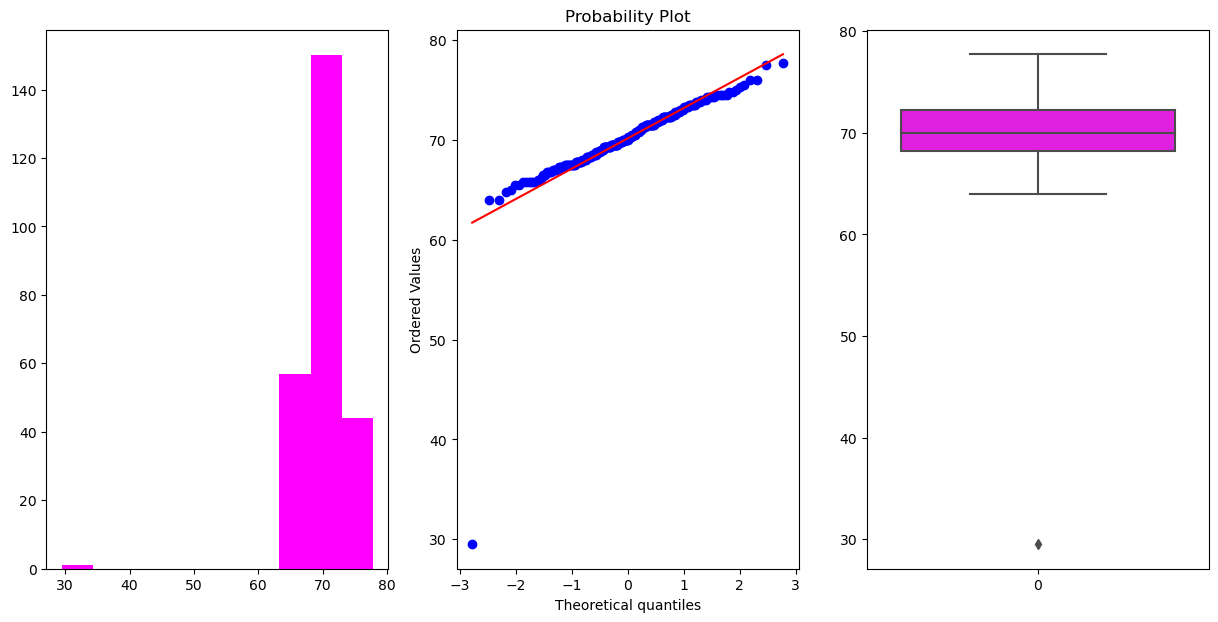

Distribution plots for the feature Neck are shown


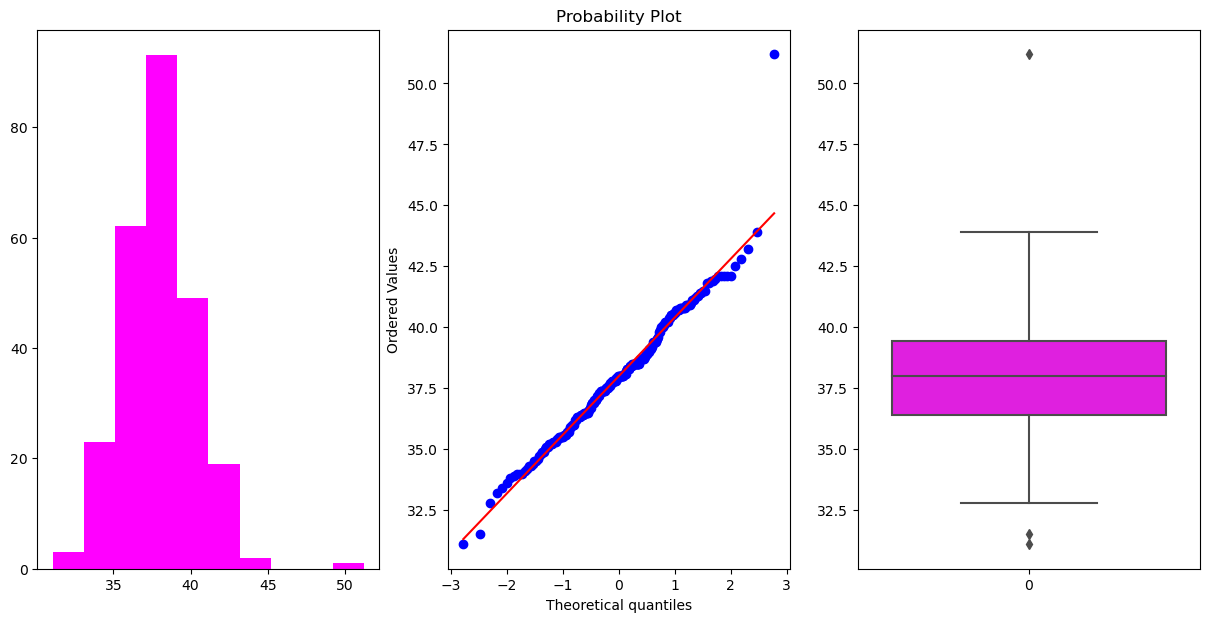

Distribution plots for the feature Chest are shown


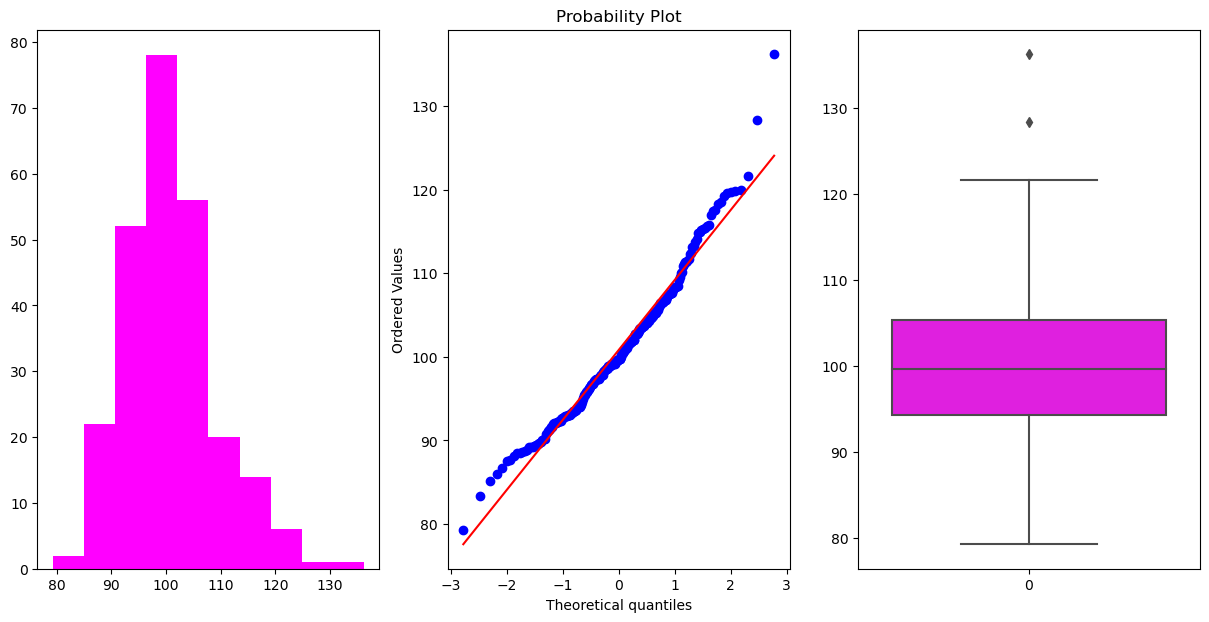

Distribution plots for the feature Abdomen are shown


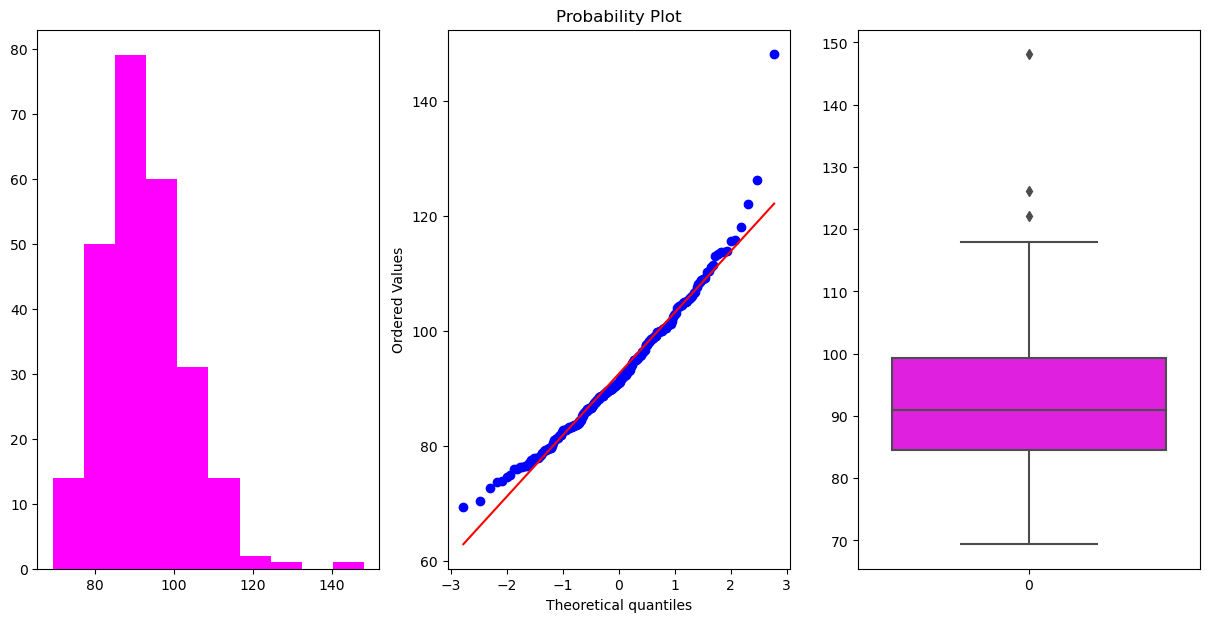

Distribution plots for the feature Hip are shown


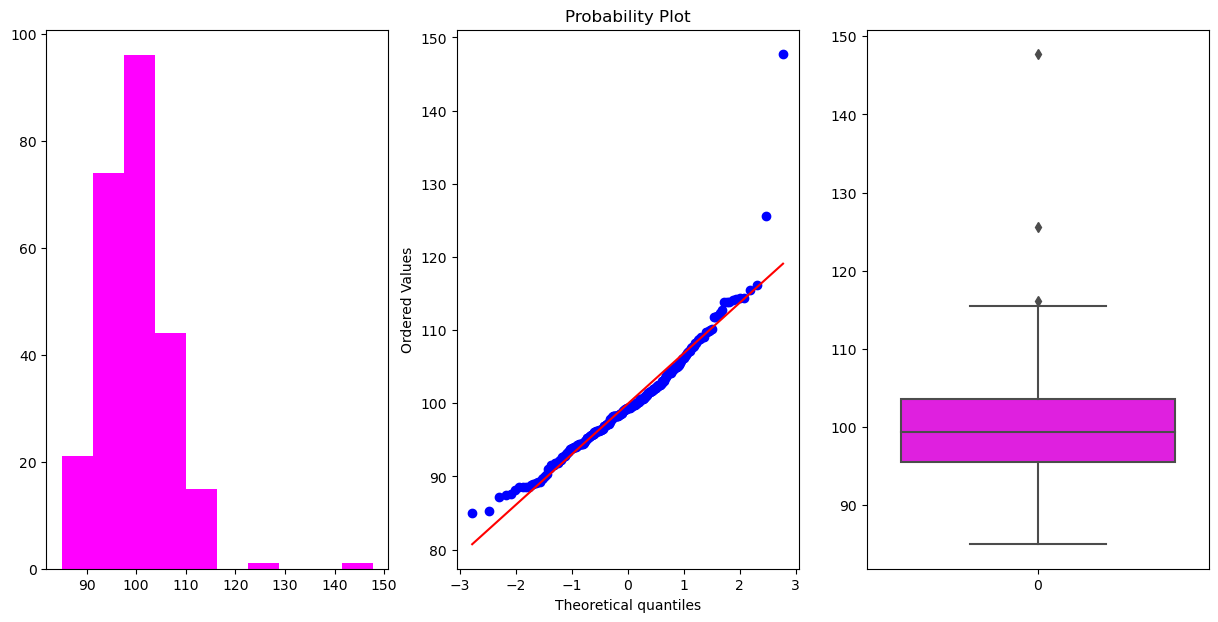

Distribution plots for the feature Thigh are shown


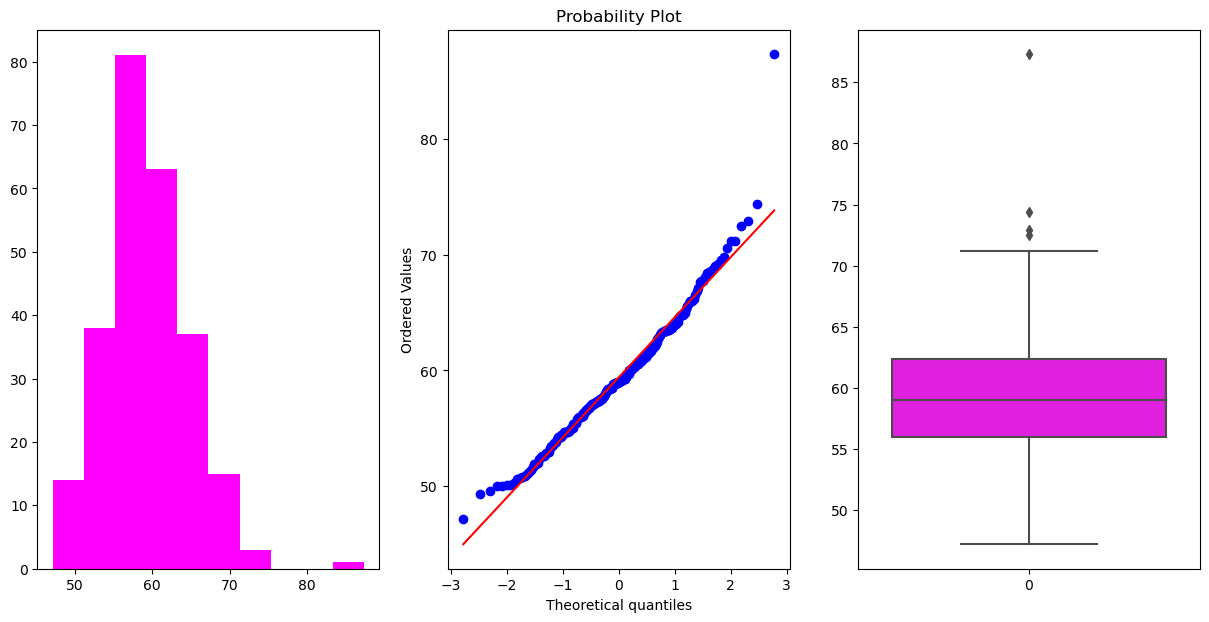

Distribution plots for the feature Knee are shown


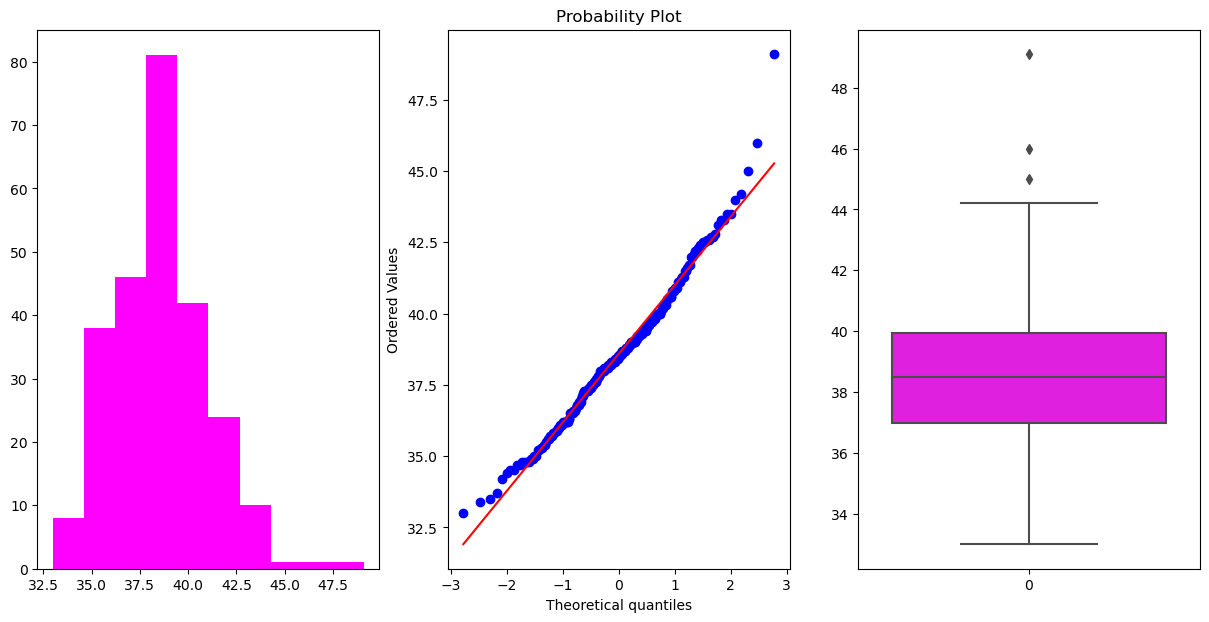

Distribution plots for the feature Ankle are shown


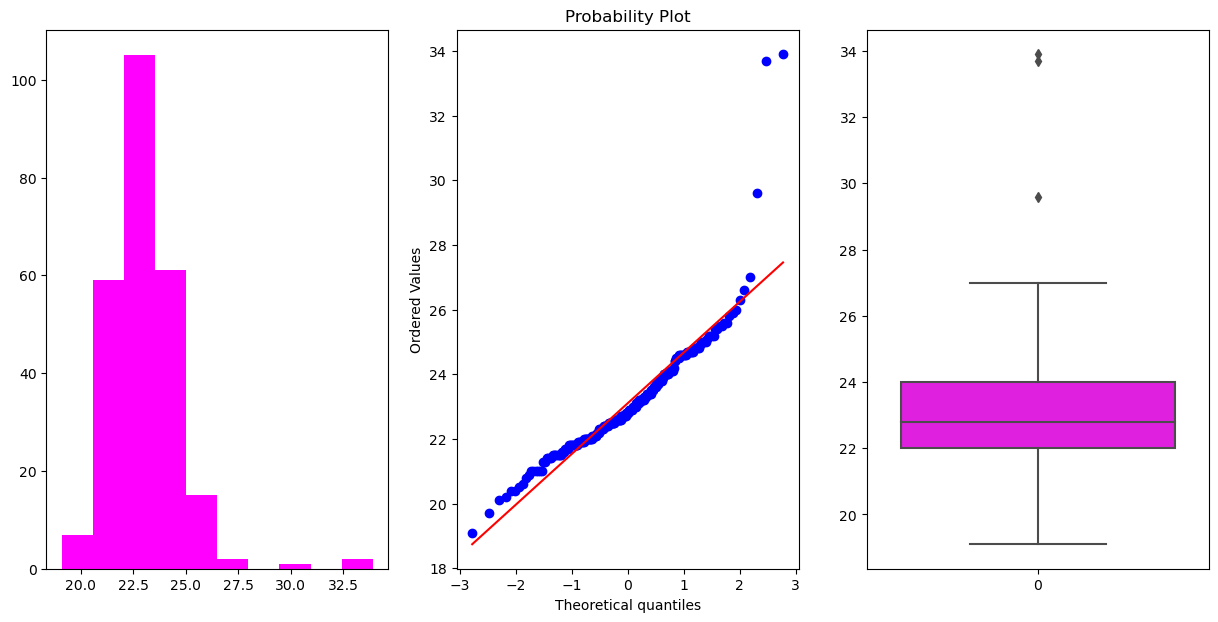

Distribution plots for the feature Biceps are shown


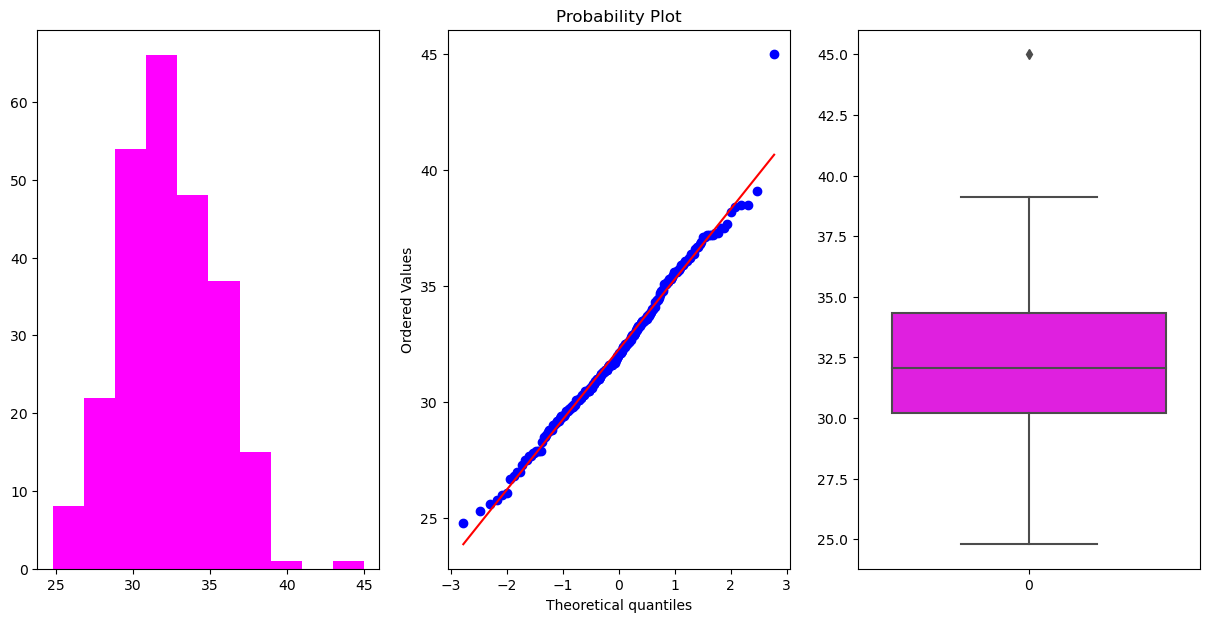

Distribution plots for the feature Forearm are shown


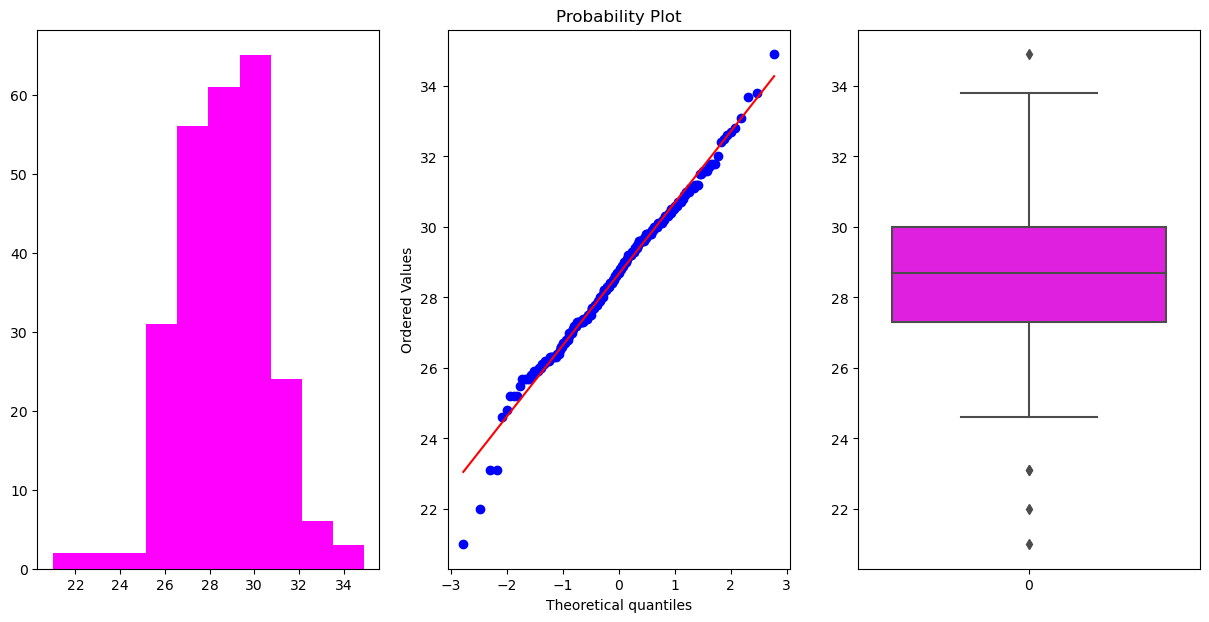

Distribution plots for the feature Wrist are shown


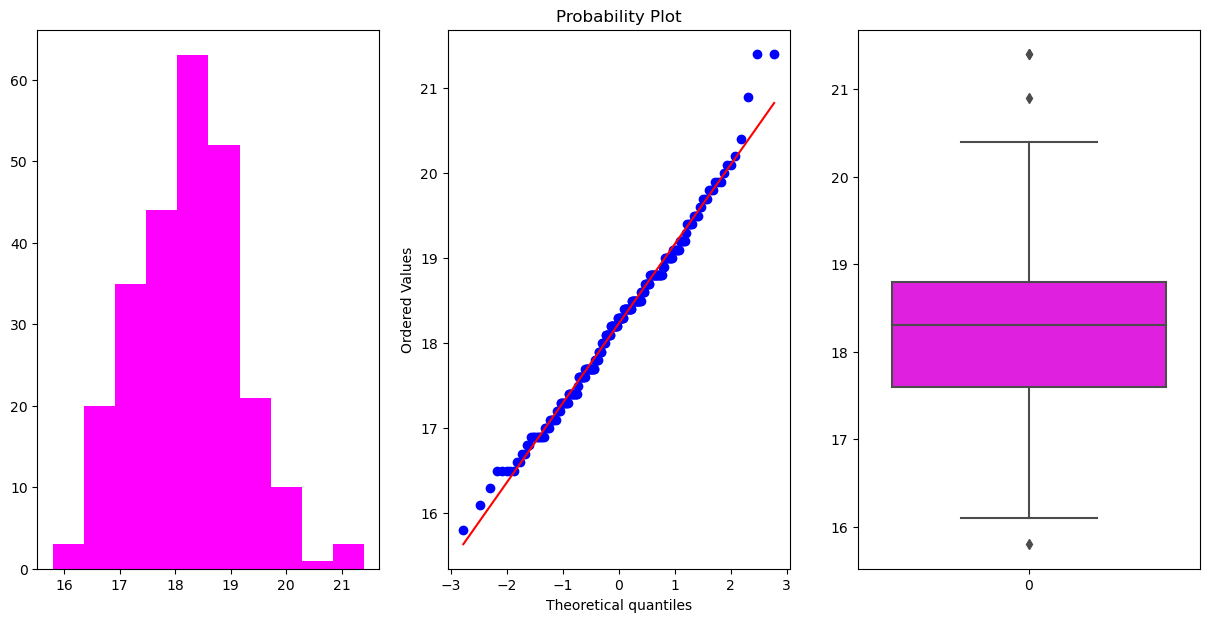

In [6]:
def drawplots(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col], color = 'magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist = 'norm', plot = plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col], color = 'magenta')
    
    plt.show()
    
cols = list(df.columns)
for i in range(len(cols)):
    print(f'Distribution plots for the feature {cols[i]} are shown')
    drawplots(df, cols[i])
    print("="*100)

## Chcking for Outliers 

In [7]:
upperlimit = []
lowerlimit = []
for i in df.columns:
    upperlimit.append(df[i].mean() + (df[i].std())*4)
    lowerlimit.append(df[i].mean() - (df[i].std())*4)

In [8]:
cols = list(df.columns)
j = 0
for i in range(len(cols)):
    temp = df.loc[(df[cols[i]]>upperlimit[j])&(df[cols[i]]<lowerlimit[j])]
    j+=1

In [9]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


## Feature Selection

In [10]:
data = df.copy()
test = data['BodyFat']
train = data.drop(['BodyFat'], axis=1)

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

In [12]:
er.feature_importances_

array([7.42733602e-01, 2.69450708e-03, 1.51040384e-02, 3.93723797e-03,
       4.83712003e-03, 4.24497095e-02, 1.50818311e-01, 1.61326880e-02,
       6.77744033e-03, 4.59412014e-03, 8.82421789e-04, 6.87581035e-03,
       6.23757539e-04, 1.53923509e-03])

<Axes: >

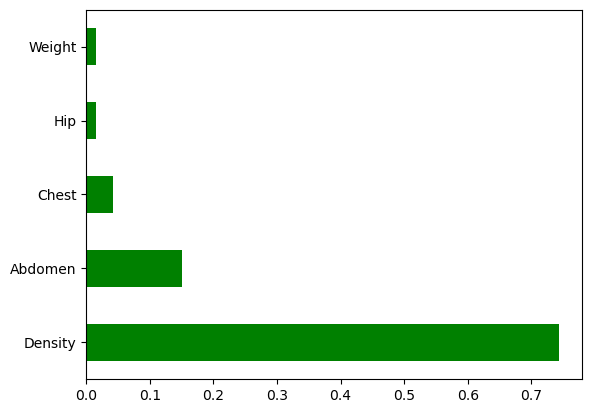

In [13]:
series = pd.Series(er.feature_importances_, index=train.columns)
series.nlargest(5).plot(kind = 'barh', color = 'green')

In [14]:
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(train, test)

<Axes: >

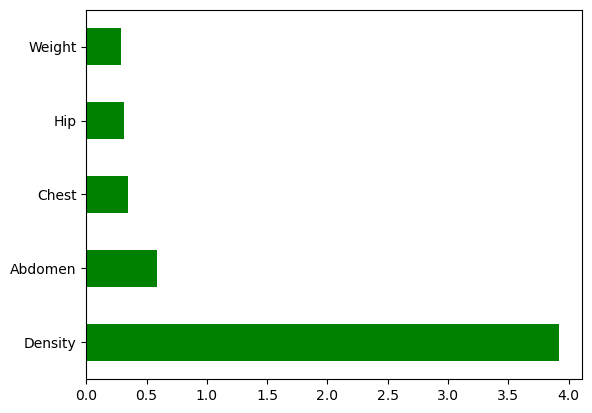

In [15]:
plotdata = pd.Series(mr, index=train.columns)
plotdata.nlargest(5).plot(kind='barh', color='green')

In [16]:
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


<Axes: >

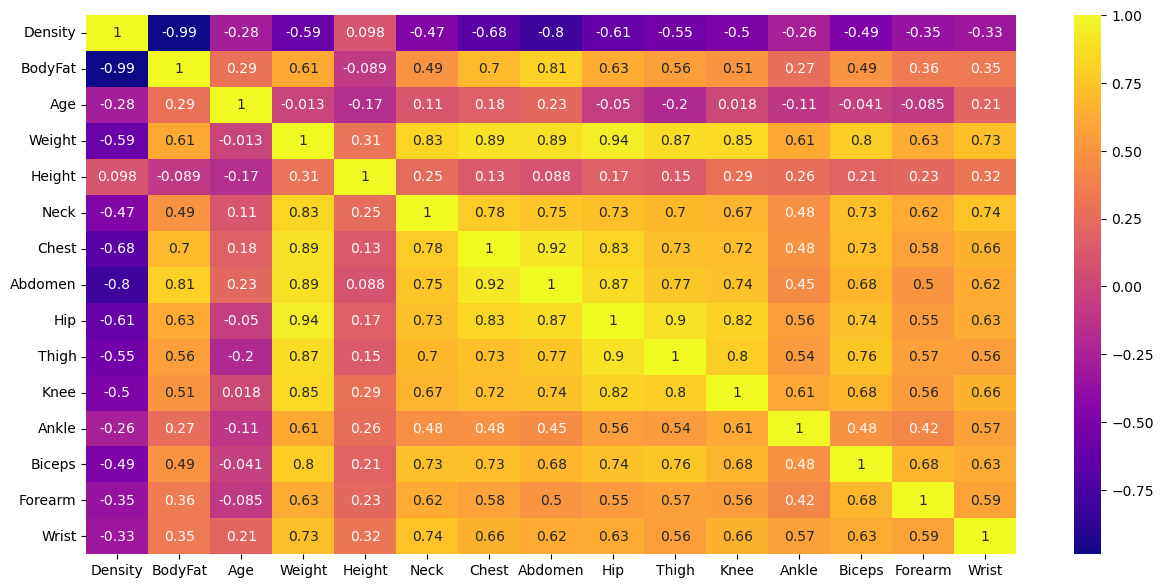

In [17]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True, cmap='plasma')

In [18]:
def correlation(df,threshold):
    colcor = set()
    cormat = df.corr()
    
    for i in range(len(cormat)):
        for j in range(i):
            if abs(cormat.iloc[i][j]) > threshold:
                colname = cormat.columns[i]
                colcor.add(colname)
    return colcor

ans = correlation(train, threshold=0.85)
ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
temp = data[list(data.columns)]
temp.values

array([[ 1.0708, 12.3   , 23.    , ..., 32.    , 27.4   , 17.1   ],
       [ 1.0853,  6.1   , 22.    , ..., 30.5   , 28.9   , 18.2   ],
       [ 1.0414, 25.3   , 22.    , ..., 28.8   , 25.2   , 16.6   ],
       ...,
       [ 1.0328, 29.3   , 72.    , ..., 31.3   , 27.2   , 18.    ],
       [ 1.0399, 26.    , 72.    , ..., 30.5   , 29.4   , 19.8   ],
       [ 1.0271, 31.9   , 74.    , ..., 33.7   , 30.    , 20.9   ]])

In [21]:
temp = data[list(data.columns)]
info = pd.DataFrame()
info['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
info['Columns'] = temp.columns
info

,VIF,Columns
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [22]:
cols1 = list(series.nlargest(5).index)
cols2 = list(series.nlargest(5).index)

In [23]:
cols1, cols2

(['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

In [24]:
totrain = train[cols1]
totrain.head()

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25


In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [26]:
X_train, X_test, y_train, y_test = train_test_split(totrain, test, test_size = 0.2)
X_train.shape, X_test.shape

((201, 5), (51, 5))

[Text(0.4955538617886179, 0.9545454545454546, 'x[0] <= 1.056\nsquared_error = 73.26\nsamples = 201\nvalue = 19.41'),
 Text(0.21252540650406504, 0.8636363636363636, 'x[0] <= 1.037\nsquared_error = 26.198\nsamples = 107\nvalue = 26.052'),
 Text(0.06529471544715447, 0.7727272727272727, 'x[0] <= 1.016\nsquared_error = 12.392\nsamples = 39\nvalue = 31.674'),
 Text(0.03353658536585366, 0.6818181818181818, 'x[4] <= 231.625\nsquared_error = 22.09\nsamples = 2\nvalue = 42.8'),
 Text(0.029471544715447155, 0.5909090909090909, 'squared_error = 0.0\nsamples = 1\nvalue = 47.5'),
 Text(0.037601626016260166, 0.5909090909090909, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(0.09705284552845528, 0.6818181818181818, 'x[0] <= 1.029\nsquared_error = 4.815\nsamples = 37\nvalue = 31.073'),
 Text(0.04573170731707317, 0.5909090909090909, 'x[0] <= 1.024\nsquared_error = 1.57\nsamples = 19\nvalue = 32.916'),
 Text(0.018292682926829267, 0.5, 'x[2] <= 117.25\nsquared_error = 0.276\nsamples = 6\nvalue = 

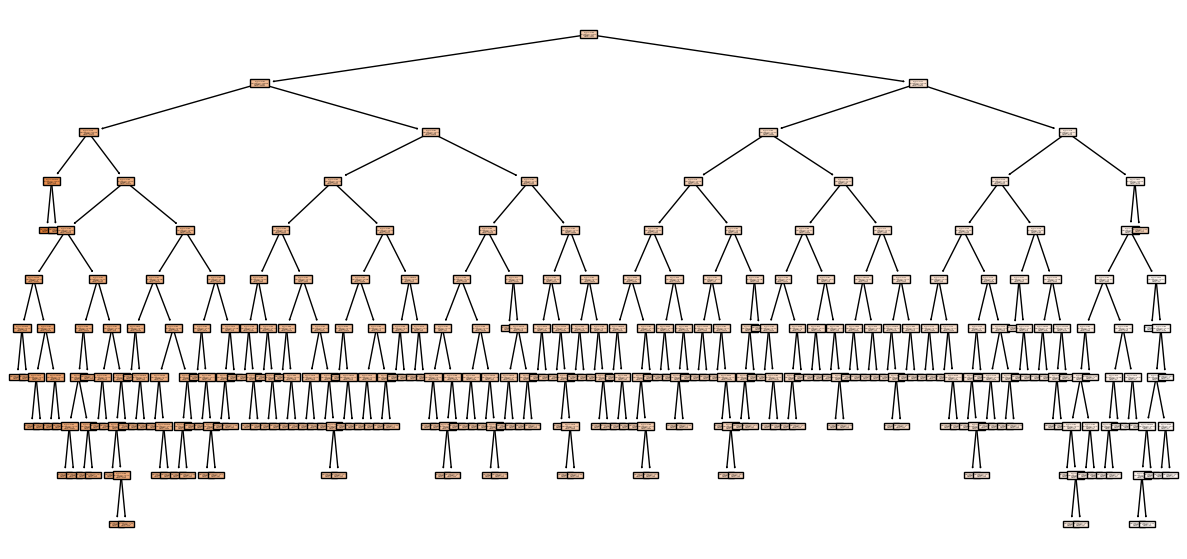

In [27]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(reg, filled=True)

In [28]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [29]:
len(ccp_alpha)

164

In [30]:
alphalist = []
for i in range(len(ccp_alpha)):
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    reg.fit(X_train, y_train)
    alphalist.append(reg)

In [31]:
alphalist[1:5]

[DecisionTreeRegressor(ccp_alpha=2.828030789094926e-16),
 DecisionTreeRegressor(ccp_alpha=5.656061578189852e-16),
 DecisionTreeRegressor(ccp_alpha=1.1312123156379704e-15),
 DecisionTreeRegressor(ccp_alpha=1.1312123156379704e-15)]

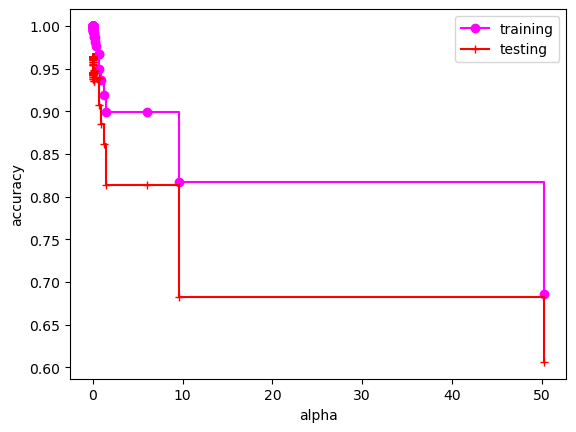

In [32]:
trainscore = [alphalist[i].score(X_train, y_train) for i in range(len(alphalist))]
testscore = [alphalist[i].score(X_test, y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha, trainscore, marker = 'o', label = 'training', color = 'magenta', drawstyle = 'steps-post')
plt.plot(ccp_alpha, testscore, marker = '+', label = 'testing', color = 'red', drawstyle = 'steps-post')
plt.legend()
plt.show()

In [33]:
clf = DecisionTreeRegressor(ccp_alpha=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f' Decision Tree Normal Approach: {metrics.r2_score(y_test,y_pred)}')

rf = RandomForestRegressor(n_estimators=1000, ccp_alpha=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f' Random Forest Normal Approach: {metrics.r2_score(y_test, y_pred_rf)}')

 Decision Tree Normal Approach: 0.8854569344333569
 Random Forest Normal Approach: 0.9197653306865549


## Hyperparameter Tuning.

In [34]:
params = {
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start = 1, stop=1200, num=40)],
            'criterion': ["squared_error", "absolute_error"],
            'max_depth': [int(x) for x in np.linspace(start=1, stop=50, num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['sqrt'],
            'ccp_alpha':[1,2,2.5,3,3.5,4,5],
        }
    },
    
    'D-tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["squared_error","absolute_error"],
            'splitter':['best', 'random'],
            'min_samples_split':[1.0,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['sqrt'],
            'ccp_alpha':[1,2,2.5,3,3.5,4,5],
        }
    },
    'SVM':{
        'model': SVR(),
        'params':{
            'C':[0.25, 0.50, 0.75, 1.0],
            'tol':[1e-10, 1e-5, 1e-4, 0.025, 0.50, 0.75],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'max_iter':[int(x) for x in np.linspace(start=1, stop=250, num=10)],
        }  
    }
}

In [35]:
scores=[]
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'], param_distributions=mp['params'],
                            cv=5, n_jobs=-1, n_iter=10, scoring='neg_mean_squared_error', error_score='raise')
    
    clf.fit(X_train, y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=194).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [36]:
scoresdf = pd.DataFrame(scores, columns=['model_name','best_score','best_estimator'])
scoresdf

,model_name,best_score,best_estimator
0,RandomForest,-5.793413,"(DecisionTreeRegressor(ccp_alpha=1, max_depth=..."
1,D-tree,-20.381623,"DecisionTreeRegressor(ccp_alpha=4, max_feature..."
2,SVM,-26.381260,"SVR(C=0.75, kernel='poly', max_iter=194, tol=0..."


In [37]:
scores[0]['best_estimator']

RandomForestRegressor(ccp_alpha=1, max_depth=25, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=677)

In [38]:
rf = scores[0]['best_estimator']
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.r2_score(y_test, y_pred))

0.8934217771578148


In [39]:
totrainlist = np.array(totrain)
predicted = []
for i in range(len(totrainlist)):
    predicted.append(rf.predict([totrainlist[i]]))

totrain['Actual Result'] = test
totrain['Predicted Result'] = np.array(predicted)
totrain

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: U

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: U

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: U

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: U

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: U

C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\timot\AppData\Local\Temp\ipykernel_45680\2471652532.py:6

,Density,Abdomen,Chest,Hip,Weight,Actual Result,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.103962
1,1.0853,83.0,93.6,98.7,173.25,6.1,8.457459
2,1.0414,87.9,95.8,99.2,154.00,25.3,21.905555
3,1.0751,86.4,101.8,101.2,184.75,10.4,11.320425
4,1.0340,100.0,97.3,101.9,184.25,28.7,27.603906
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,10.510118
248,1.0236,105.0,108.5,104.5,201.00,33.6,30.335046
249,1.0328,111.5,111.1,101.7,186.75,29.3,29.673002
250,1.0399,101.3,108.3,97.8,190.75,26.0,25.747928


[]

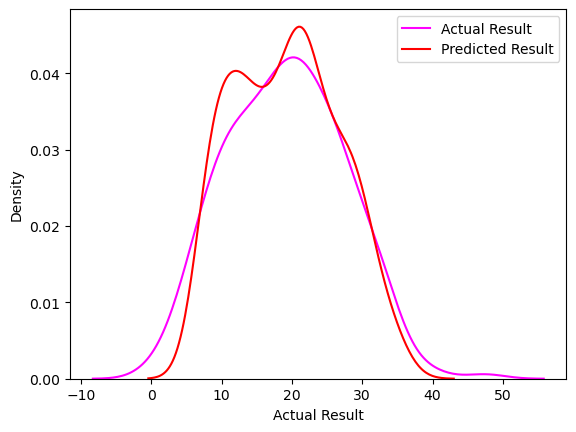

In [40]:
sn.kdeplot(totrain['Actual Result'], label='Actual Result', color = 'magenta')
sn.kdeplot(totrain['Predicted Result'], label='Predicted Result', color = 'red')
plt.legend()
plt.plot()

In [41]:
import pickle
file = open('bodyfatmodel.pkl','wb')
pickle.dump(rf, file)
file.close()